In [1]:
!pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.5/12.1 MB 1.1 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/12.1 MB 837.8 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.1 MB 837.8 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.1 MB 837.8 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.1 MB 837.8 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.1 MB 837.8 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.1 MB 837.8 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.1 MB 837.8 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.1 MB 837.8 kB/s eta 0:00:14
   -

#### 1. Importing the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet

#### 2. Loading the Dataset

In [3]:
gold_df=pd.read_csv("Gold Price.csv")

In [4]:
gold_df

,Date,Price,Open,High,Low,Volume,Chg%
0,2024-11-06,77030,78300,78570,77030,0,-1.86
1,2024-11-05,78490,78224,78670,78160,0,0.11
2,2024-11-04,78401,78498,78642,78237,0,-0.54
3,2024-11-01,78829,78650,78887,78550,0,0.64
4,2024-10-31,78326,79264,79999,77803,90,-1.17
...,...,...,...,...,...,...,...
2801,2014-01-06,29119,29300,29395,29051,24380,-0.55
2802,2014-01-04,29279,29279,29279,29279,0,-1.51
2803,2014-01-03,29727,30031,30125,29539,3050,-0.83
2804,2014-01-02,29975,29678,30050,29678,3140,1.47


#### Checking for Missing Values

In [5]:
gold_df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

#### Checking for Datatypes

In [6]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2806 non-null   object 
 1   Price   2806 non-null   int64  
 2   Open    2806 non-null   int64  
 3   High    2806 non-null   int64  
 4   Low     2806 non-null   int64  
 5   Volume  2806 non-null   int64  
 6   Chg%    2806 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 153.6+ KB


#### we can see that Date is not in proper Date time format so we need to change it

In [7]:
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
#formating into datatime, important for the analysis

In [8]:
gold_df.Date

0      2024-11-06
1      2024-11-05
2      2024-11-04
3      2024-11-01
4      2024-10-31
          ...    
2801   2014-01-06
2802   2014-01-04
2803   2014-01-03
2804   2014-01-02
2805   2014-01-01
Name: Date, Length: 2806, dtype: datetime64[ns]

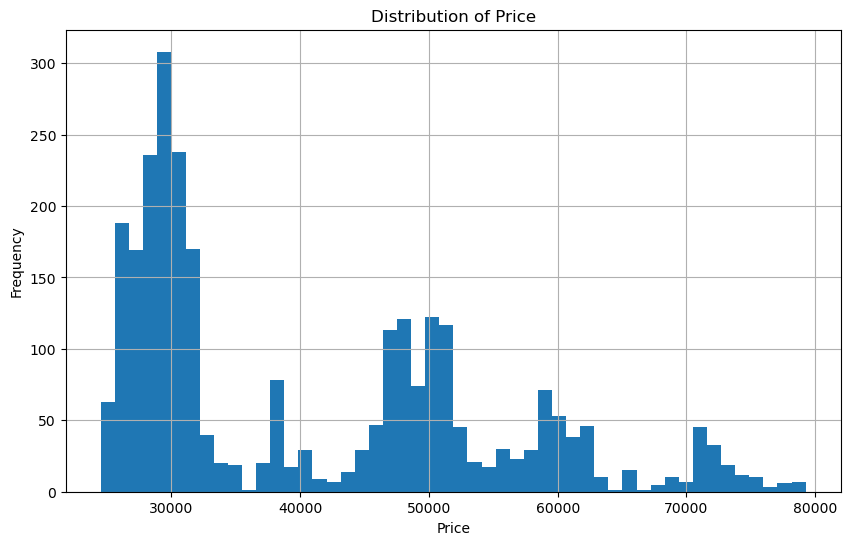

In [9]:
gold_df['Price'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

- The price distribution shows multiple peaks, indicating different market phases.        
Gold prices are not concentrated in one range — instead, they form clusters around ₹28k, ₹48k, ₹60k, and ₹72k, showing how gold moved through several major price cycles over the years.

- Most of the observations fall between ₹27,000–₹32,000 and ₹47,000–₹52,000.          
These ranges represent the highest trading frequency, meaning gold spent more time in these price bands compared to extremely high-price ranges like ₹70,000+.

In [10]:
#Yearly analysis
gold_df.index=pd.DatetimeIndex(gold_df.Date)

In [11]:
gold_df.resample('YE').size()

Date
2014-12-31    268
2015-12-31    262
2016-12-31    259
2017-12-31    255
2018-12-31    256
2019-12-31    257
2020-12-31    258
2021-12-31    259
2022-12-31    257
2023-12-31    256
2024-12-31    219
Freq: YE-DEC, dtype: int64

In [12]:
gold_df.reset_index(drop=True)

,Date,Price,Open,High,Low,Volume,Chg%
0,2024-11-06,77030,78300,78570,77030,0,-1.86
1,2024-11-05,78490,78224,78670,78160,0,0.11
2,2024-11-04,78401,78498,78642,78237,0,-0.54
3,2024-11-01,78829,78650,78887,78550,0,0.64
4,2024-10-31,78326,79264,79999,77803,90,-1.17
...,...,...,...,...,...,...,...
2801,2014-01-06,29119,29300,29395,29051,24380,-0.55
2802,2014-01-04,29279,29279,29279,29279,0,-1.51
2803,2014-01-03,29727,30031,30125,29539,3050,-0.83
2804,2014-01-02,29975,29678,30050,29678,3140,1.47


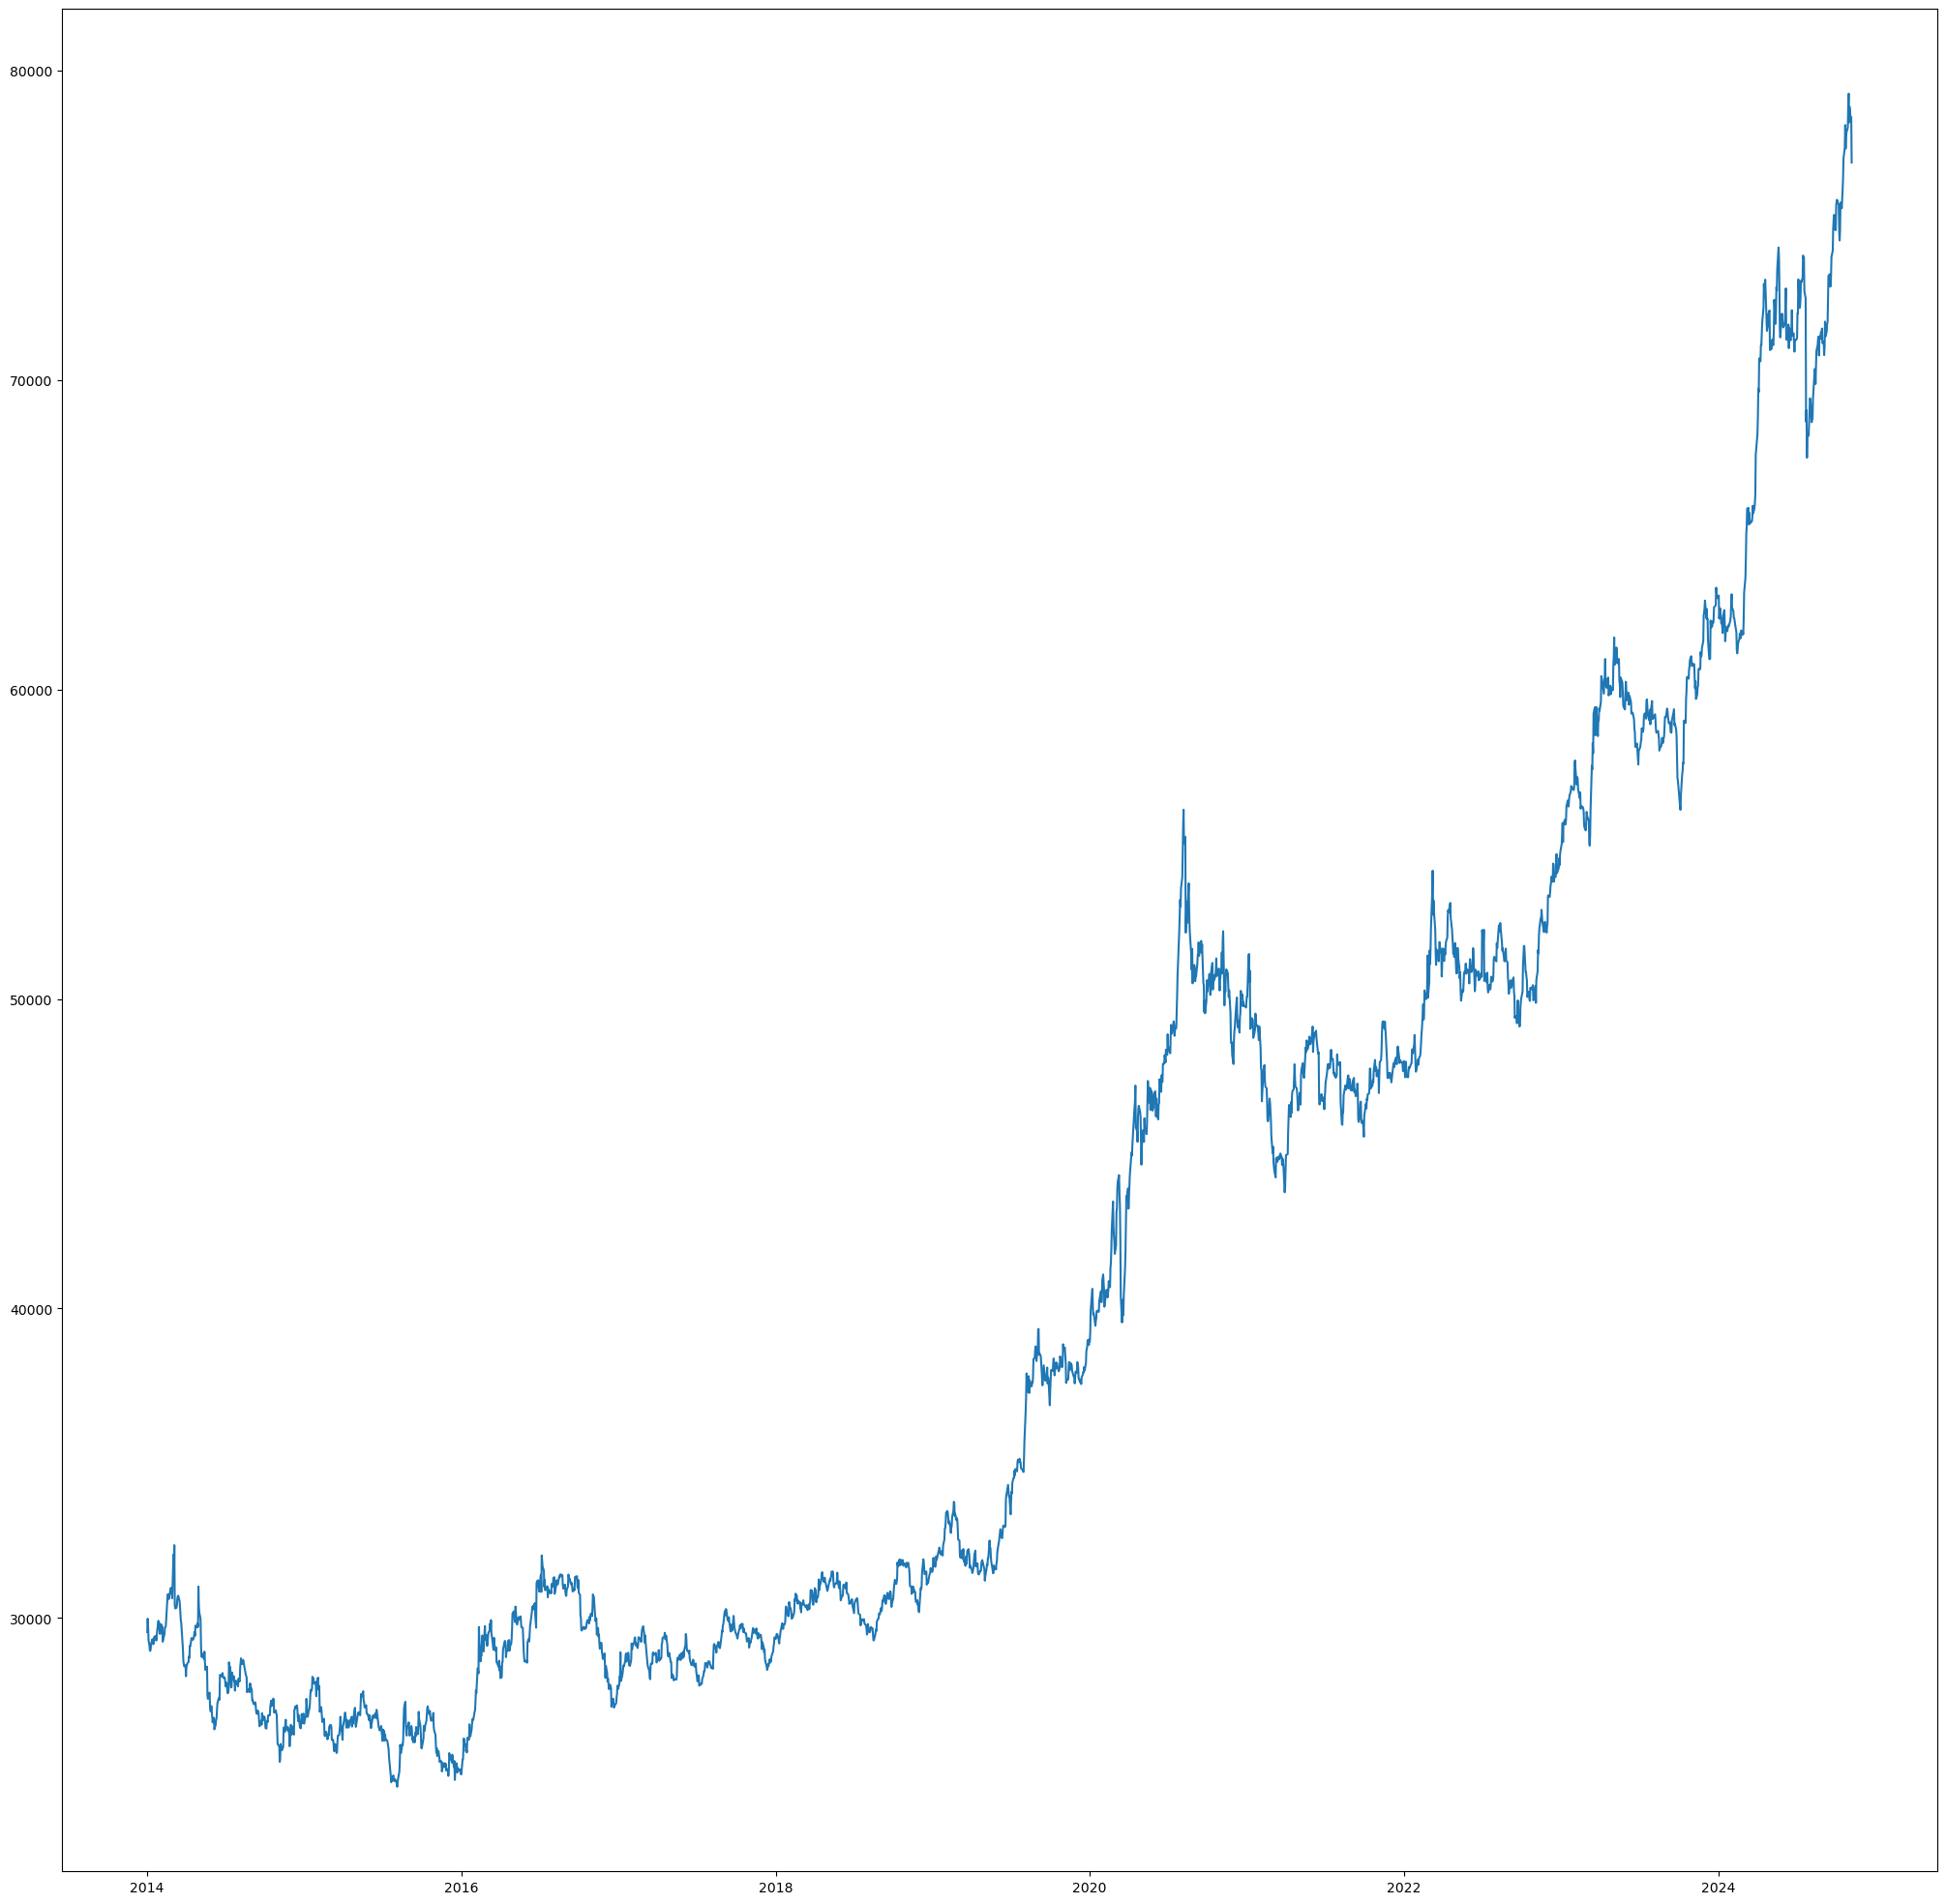

In [13]:
plt.figure(figsize=(25,25))
plt.plot(gold_df.groupby(gold_df['Date'])['Price'].mean())

In [14]:
gold_df.set_index('Date', inplace=True)
monthly_avg_price = gold_df['Price'].resample('ME').mean()

In [15]:
monthly_avg_price

Date
2014-01-31    29386.500000
2014-02-28    30184.450000
2014-03-31    30100.190476
2014-04-30    29199.521739
2014-05-31    28373.636364
                  ...     
2024-07-31    71475.913043
2024-08-31    70412.666667
2024-09-30    73038.857143
2024-10-31    76716.272727
2024-11-30    78187.500000
Freq: ME, Name: Price, Length: 131, dtype: float64

In [16]:
gold_df.tail(24).Price.mean()

np.float64(29386.5)

In [17]:
monthly_avg_price.index

DatetimeIndex(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31',
               ...
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30'],
              dtype='datetime64[ns]', name='Date', length=131, freq='ME')

In [18]:
# Now will perform for every 6 Months 
monthly_avg_price.index[::6]

DatetimeIndex(['2014-01-31', '2014-07-31', '2015-01-31', '2015-07-31',
               '2016-01-31', '2016-07-31', '2017-01-31', '2017-07-31',
               '2018-01-31', '2018-07-31', '2019-01-31', '2019-07-31',
               '2020-01-31', '2020-07-31', '2021-01-31', '2021-07-31',
               '2022-01-31', '2022-07-31', '2023-01-31', '2023-07-31',
               '2024-01-31', '2024-07-31'],
              dtype='datetime64[ns]', name='Date', freq='6ME')

In [19]:
monthly_avg_price.index.strftime('%b %Y')

Index(['Jan 2014', 'Feb 2014', 'Mar 2014', 'Apr 2014', 'May 2014', 'Jun 2014',
       'Jul 2014', 'Aug 2014', 'Sep 2014', 'Oct 2014',
       ...
       'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024', 'Jul 2024',
       'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024'],
      dtype='object', name='Date', length=131)

([<matplotlib.axis.XTick at 0x12057744190>,
 [Text(16101.0, 0, 'Jan 2014'),
  Text(16282.0, 0, 'Jul 2014'),
  Text(16466.0, 0, 'Jan 2015'),
  Text(16647.0, 0, 'Jul 2015'),
  Text(16831.0, 0, 'Jan 2016'),
  Text(17013.0, 0, 'Jul 2016'),
  Text(17197.0, 0, 'Jan 2017'),
  Text(17378.0, 0, 'Jul 2017'),
  Text(17562.0, 0, 'Jan 2018'),
  Text(17743.0, 0, 'Jul 2018'),
  Text(17927.0, 0, 'Jan 2019'),
  Text(18108.0, 0, 'Jul 2019'),
  Text(18292.0, 0, 'Jan 2020'),
  Text(18474.0, 0, 'Jul 2020'),
  Text(18658.0, 0, 'Jan 2021'),
  Text(18839.0, 0, 'Jul 2021'),
  Text(19023.0, 0, 'Jan 2022'),
  Text(19204.0, 0, 'Jul 2022'),
  Text(19388.0, 0, 'Jan 2023'),
  Text(19569.0, 0, 'Jul 2023'),
  Text(19753.0, 0, 'Jan 2024'),
  Text(19935.0, 0, 'Jul 2024')])

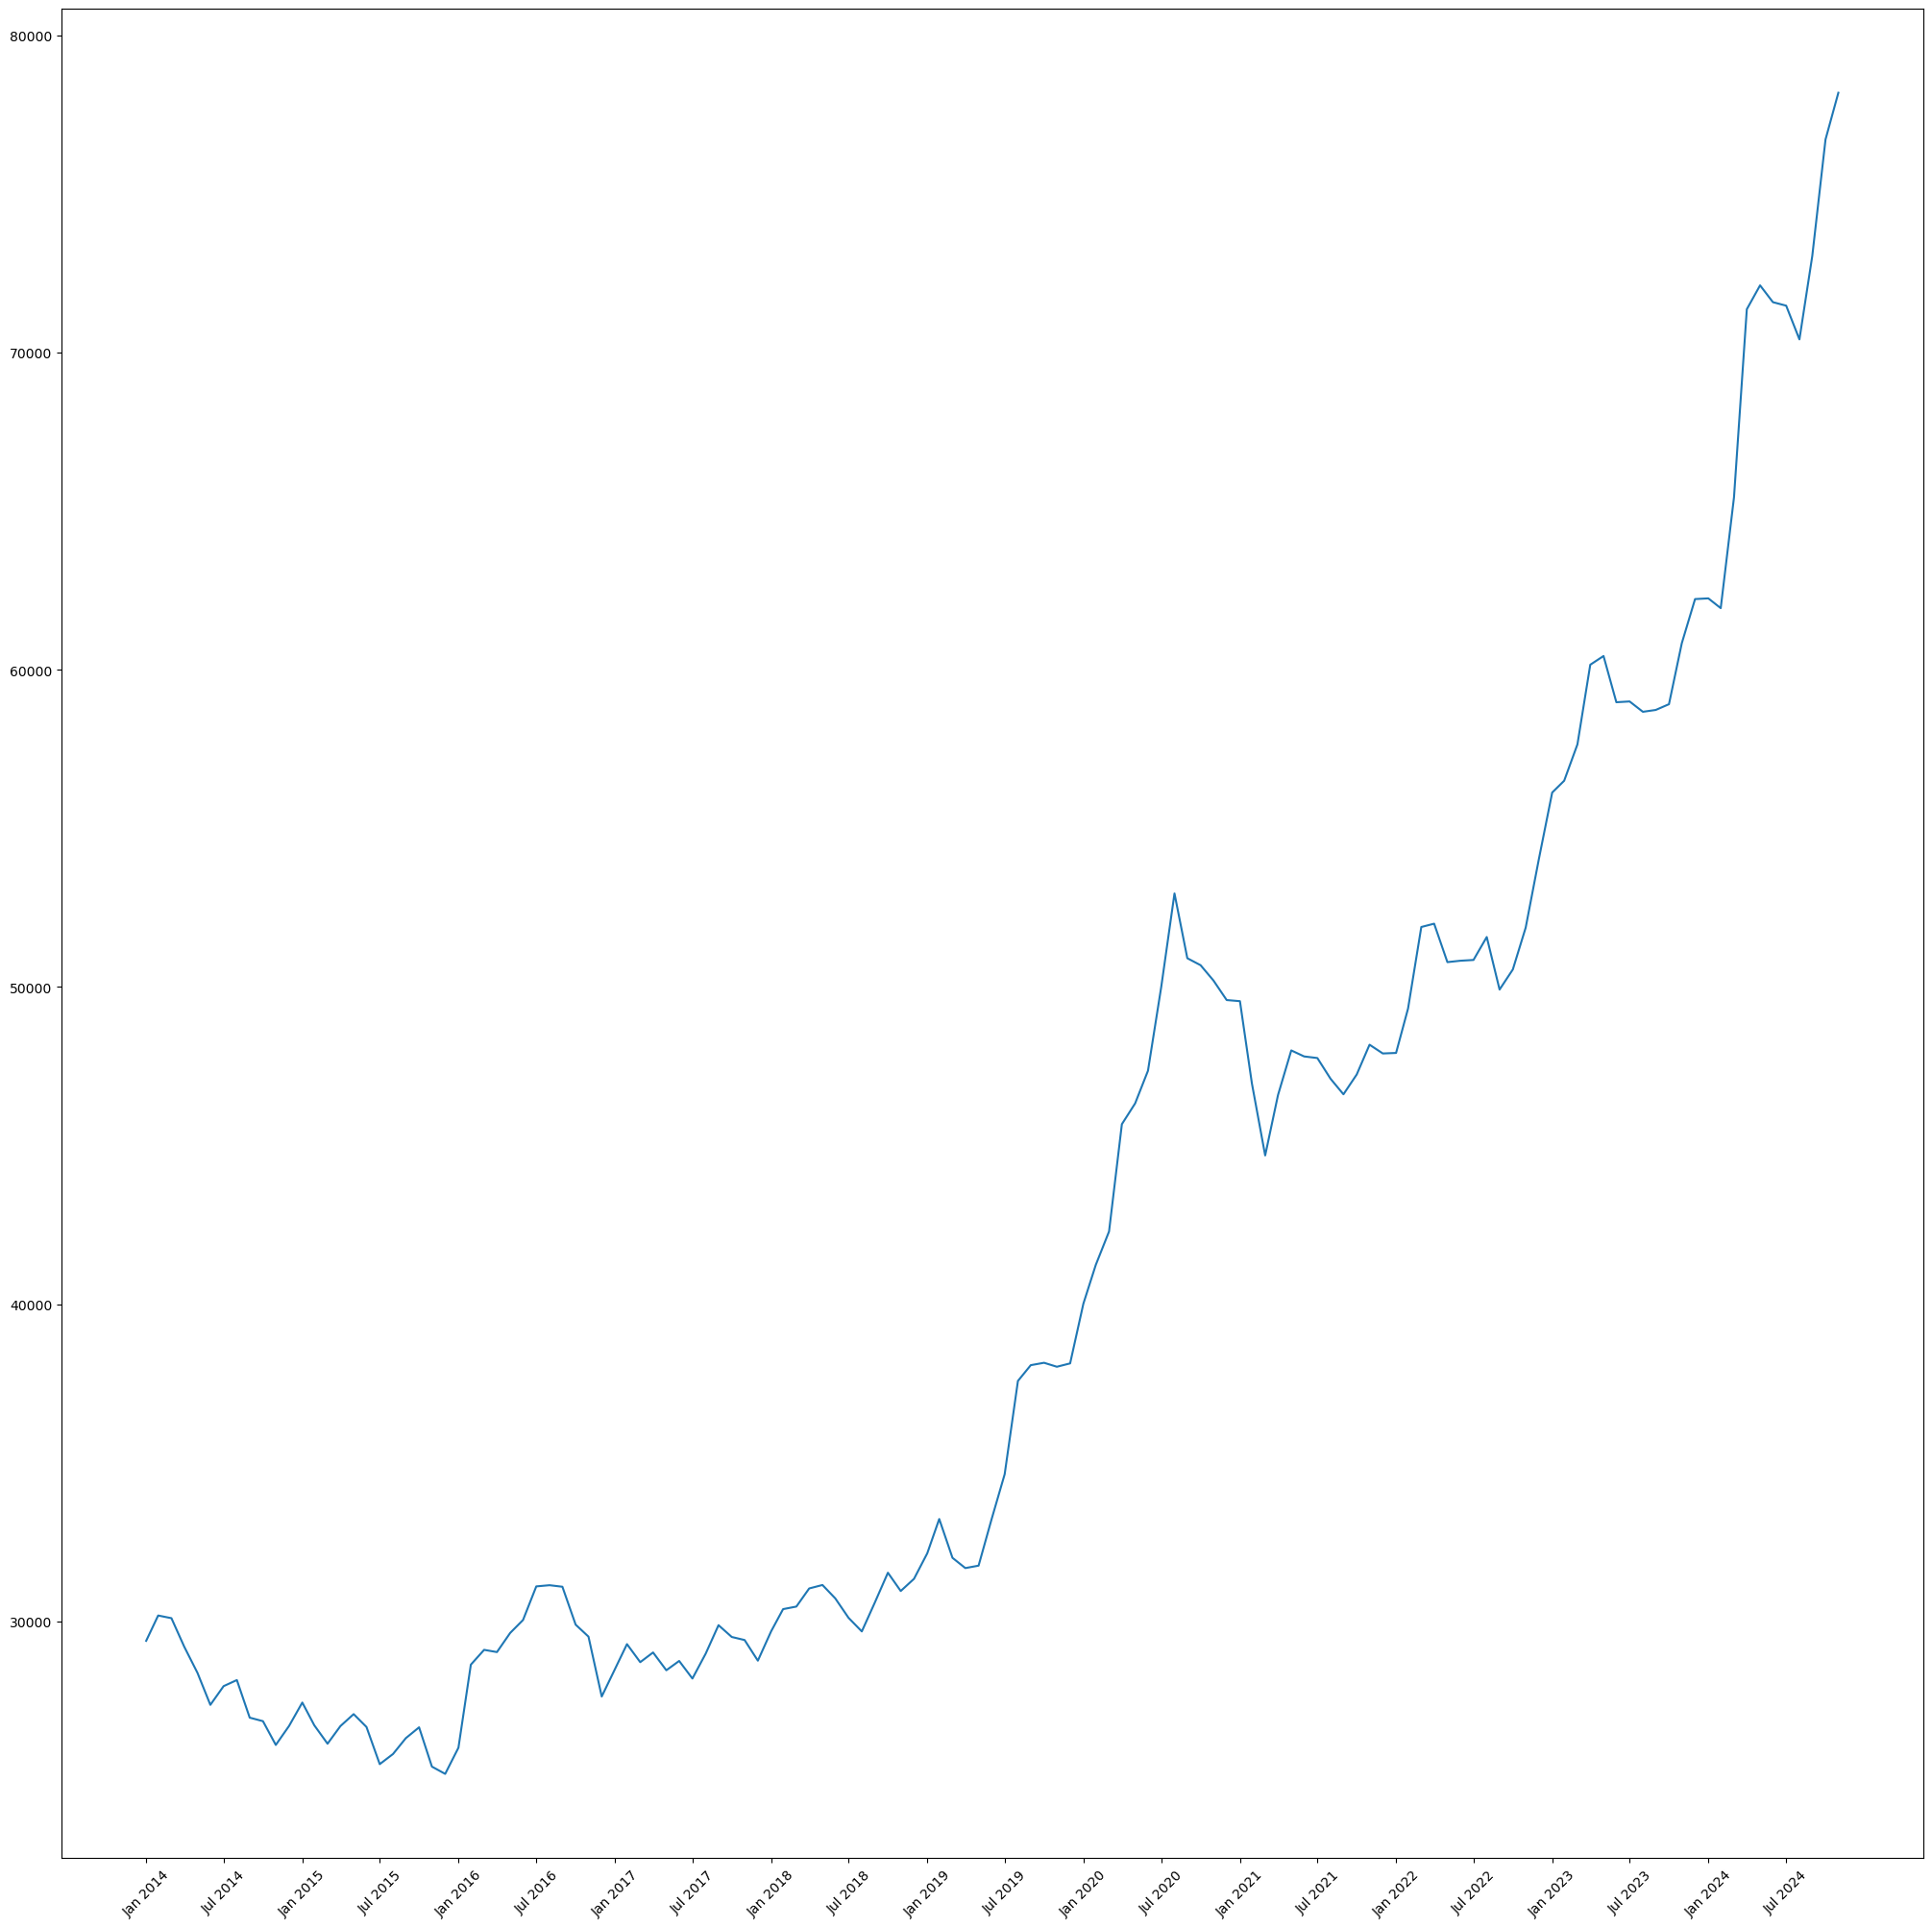

In [20]:
# Now will perform for every 6 Months 
plt.figure(figsize=(25,25))
plt.plot(monthly_avg_price)
plt.xticks(monthly_avg_price.index[::6], monthly_avg_price.index.strftime('%b %Y')[::6], rotation=45)  # every 6 months

In [21]:
monthly_avg_price

Date
2014-01-31    29386.500000
2014-02-28    30184.450000
2014-03-31    30100.190476
2014-04-30    29199.521739
2014-05-31    28373.636364
                  ...     
2024-07-31    71475.913043
2024-08-31    70412.666667
2024-09-30    73038.857143
2024-10-31    76716.272727
2024-11-30    78187.500000
Freq: ME, Name: Price, Length: 131, dtype: float64

In [35]:
#doing the prediction using Prophet time series model

In [22]:
from prophet import Prophet

# Create an instance of the Prophet model
d = Prophet()

In [23]:
fin=gold_df['Price'].reset_index()

In [24]:
fin.head()

,Date,Price
0,2024-11-06,77030
1,2024-11-05,78490
2,2024-11-04,78401
3,2024-11-01,78829
4,2024-10-31,78326


In [25]:
fin=fin.rename(columns={'Date':'ds','Price':'y'})

In [26]:
d.fit(fin)

21:57:51 - cmdstanpy - INFO - Chain [1] start processing
21:57:55 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future=d.make_future_dataframe(periods=365)
forecast=d.predict(future)

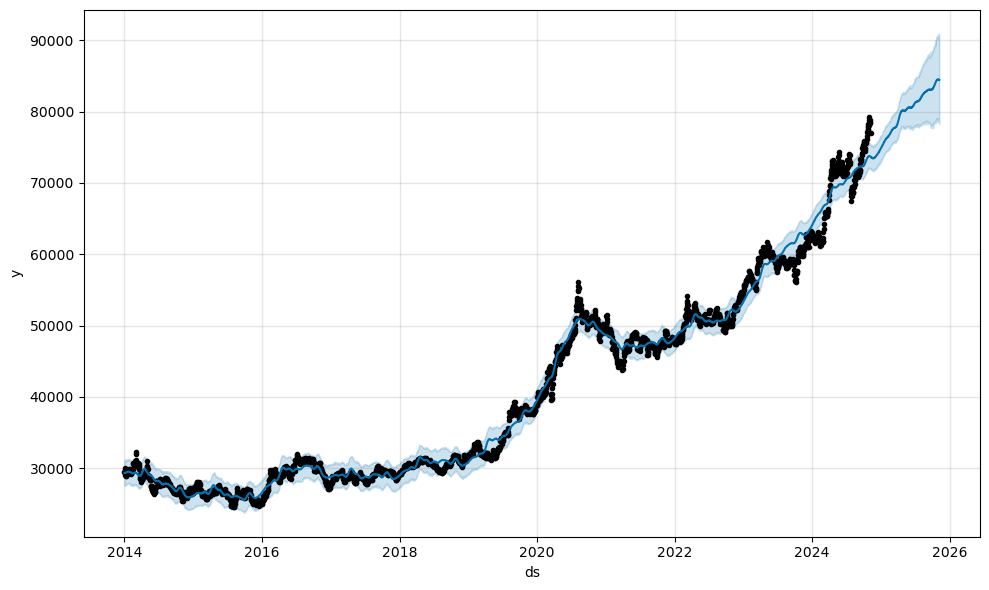

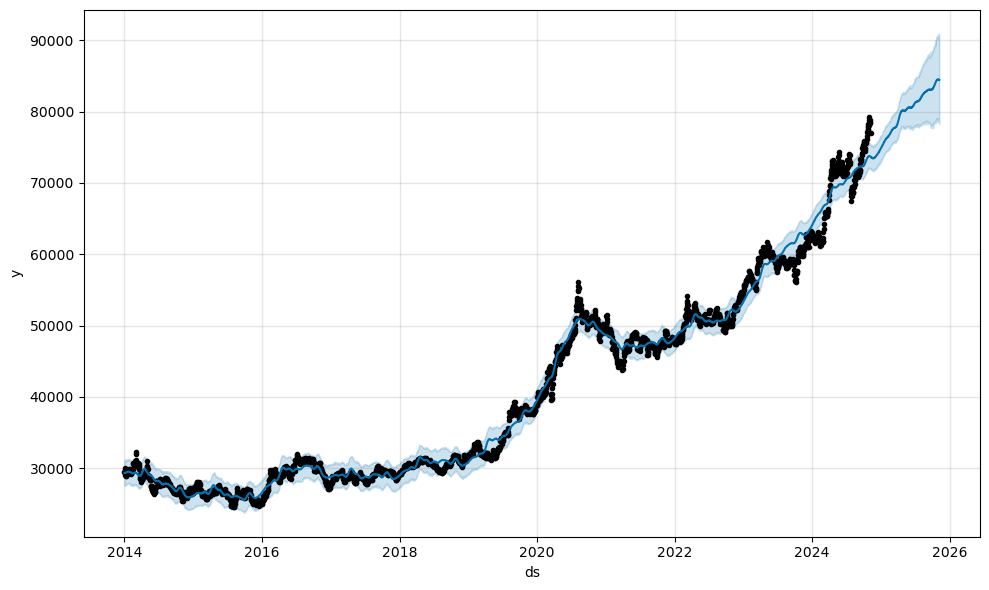

In [28]:
d.plot(forecast)

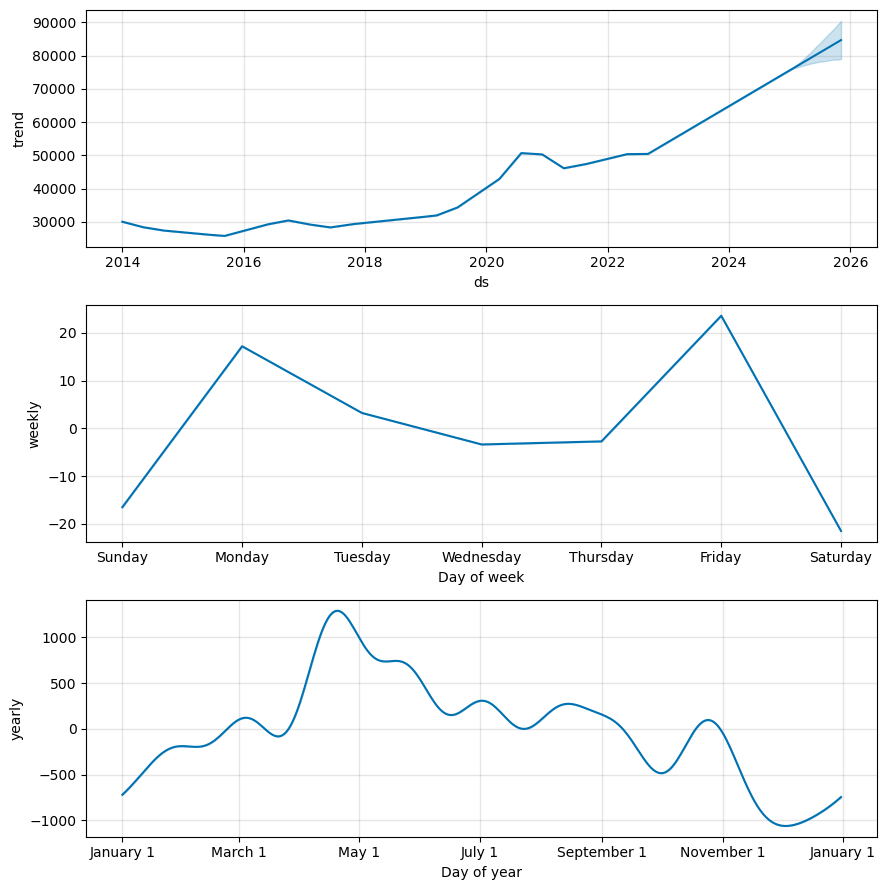

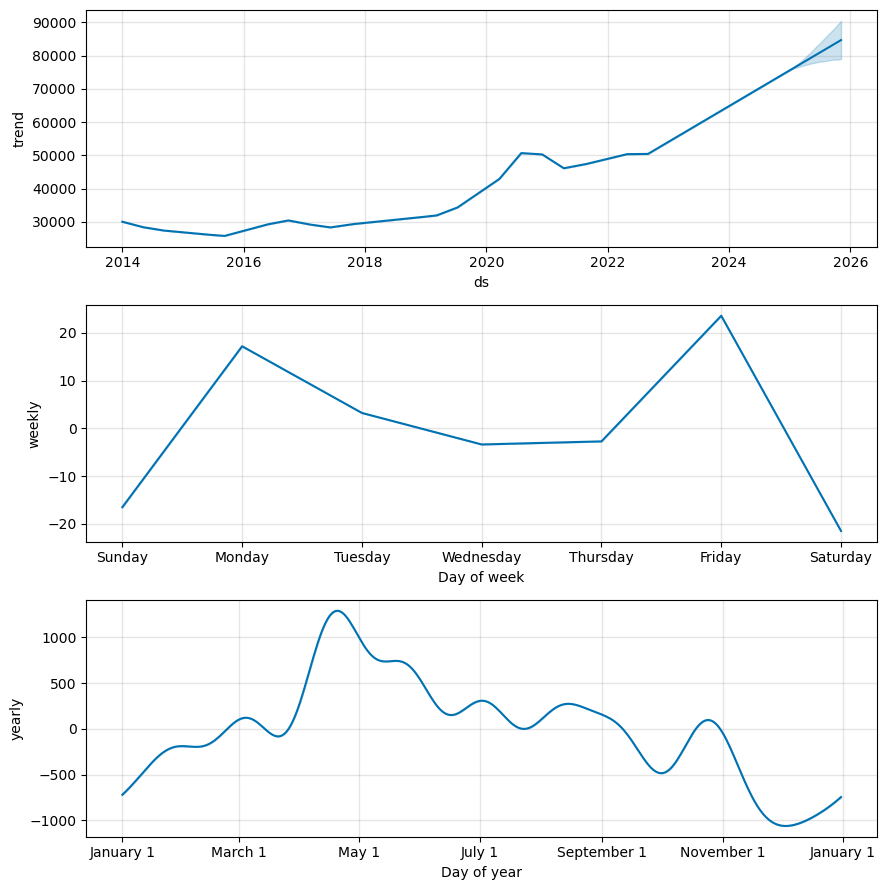

In [29]:
d.plot_components(forecast)

INTERPRETATIONS OF THE GRAPHS:
1) In the weekly trend it is noticed that the price increases on monday when the markets open and a similar trend is noticed on Friday when the markets close
2) In the yearly trend it is noticed that the price increases before May, this could be because of the Hindu festival called Akshay Tritiya, and then constant decline, with a mild peak around November
3) The model predicted the gold price for the year 2025 to reach a peak of 90000 or a low of around 78000, The current price of 22-carat gold per gram in Delhi today is ₹9,305. It was priced at ₹9,030